### Question 1: Explore bivariate results (Use visualizations)
Describe any relationships you see between particular features and the target variable

In [55]:
# importing all required packages
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
from numpy import array
from numpy import argmax
from sklearn import preprocessing
from sklearn.compose import ColumnTransformer, make_column_transformer
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler, OneHotEncoder, LabelEncoder
from sklearn.model_selection import GridSearchCV, train_test_split
from sklearn.linear_model import Lasso, LogisticRegression
from sklearn.feature_selection import SelectFromModel,RFE
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from keras.layers import Dense, Activation, Dropout, BatchNormalization
from keras.models import Sequential
from keras.optimizers import SGD, Adam
from keras.wrappers.scikit_learn import KerasClassifier
from keras.regularizers import l1_l2
from keras import initializers
from keras.callbacks import EarlyStopping, ModelCheckpoint
from sklearn.metrics import accuracy_score
from sklearn.metrics import f1_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import roc_auc_score
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
from sklearn.metrics import mean_absolute_error
from math import sqrt
import pickle
import os
import aimodelshare as ai

In [56]:
# importing and setting up the data

data=pd.read_csv("C:/Users/jaeha/Documents/Columbia/Spring 2020/AdvancedML/MiniHackathon_WorldHappiness/worldhappiness2019.csv")

regiondata=pd.read_csv("C:/Users/jaeha/Documents/Columbia/Spring 2020/AdvancedML/MiniHackathon_WorldHappiness/region.csv")


mergedata=pd.merge(data, regiondata, how='left', left_on='Country or region', right_on='name')
# Check for missing values
mergedata.loc[pd.isnull(mergedata).iloc[:,9]].to_csv("missing.csv",index=False)

# clean up final region data for only variables of interest
mergedata = mergedata.drop(['name'],axis=1)
mergedata = mergedata.drop(['Country or region'],axis=1)
mergedata = mergedata.drop(['sub-region'],axis=1)

mergedata.head()

,Happiness_level,GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices,Generosity,Perceptions of corruption,region
0,Very High,1.340,1.587,0.986,0.596,0.153,0.393,Europe
1,Very High,1.383,1.573,0.996,0.592,0.252,0.410,Europe
2,Very High,1.488,1.582,1.028,0.603,0.271,0.341,Europe
3,Very High,1.380,1.624,1.026,0.591,0.354,0.118,Europe
4,Very High,1.396,1.522,0.999,0.557,0.322,0.298,Europe


In [57]:
# manually encoding categorical target variable solely for exploratory data analysis purposes
manual_encoding = {"Happiness_level": {"Very High":5,"High":4,"Average":3,"Low":2,"Very Low":1}}
mergedata.replace(manual_encoding, inplace=True)
# label encoding regions
mergedata.region = LabelEncoder().fit_transform(mergedata.region)
mergedata.head()

,Happiness_level,GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices,Generosity,Perceptions of corruption,region
0,5,1.340,1.587,0.986,0.596,0.153,0.393,3
1,5,1.383,1.573,0.996,0.592,0.252,0.410,3
2,5,1.488,1.582,1.028,0.603,0.271,0.341,3
3,5,1.380,1.624,1.026,0.591,0.354,0.118,3
4,5,1.396,1.522,0.999,0.557,0.322,0.298,3


Text(0.5, 1.0, 'GDP vs Happiness')

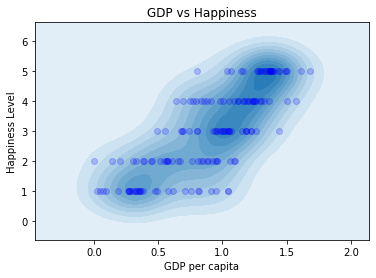

In [58]:
sns.kdeplot(data=mergedata['GDP per capita'],data2=mergedata['Happiness_level'],shade=True)
plt.scatter(x=mergedata['GDP per capita'],y=mergedata['Happiness_level'],alpha=0.2,color='blue')
plt.xlabel('GDP per capita')
plt.ylabel('Happiness Level')
plt.title('GDP vs Happiness')

Text(0.5, 1.0, 'Social Support vs Happiness')

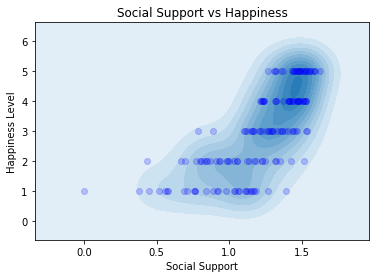

In [59]:
sns.kdeplot(data=mergedata['Social support'],data2=mergedata['Happiness_level'],shade=True)
plt.scatter(x=mergedata['Social support'],y=mergedata['Happiness_level'],alpha=0.2,color='blue')
plt.xlabel('Social Support')
plt.ylabel('Happiness Level')
plt.title('Social Support vs Happiness')

Text(0.5, 1.0, 'Health vs Happiness')

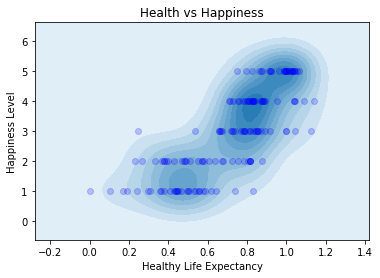

In [60]:
sns.kdeplot(data=mergedata['Healthy life expectancy'],data2=mergedata['Happiness_level'],shade=True)
plt.scatter(x=mergedata['Healthy life expectancy'],y=mergedata['Happiness_level'],alpha=0.2,color='blue')
plt.xlabel('Healthy Life Expectancy')
plt.ylabel('Happiness Level')
plt.title('Health vs Happiness')

Text(0.5, 1.0, 'Freedom vs Happiness')

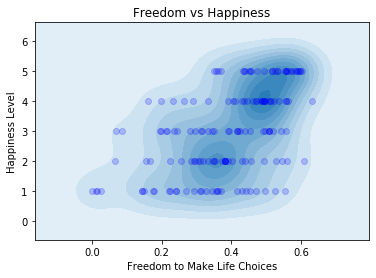

In [61]:
sns.kdeplot(data=mergedata['Freedom to make life choices'],data2=mergedata['Happiness_level'],shade=True)
plt.scatter(x=mergedata['Freedom to make life choices'],y=mergedata['Happiness_level'],alpha=0.2,color='blue')
plt.xlabel('Freedom to Make Life Choices')
plt.ylabel('Happiness Level')
plt.title('Freedom vs Happiness')

Text(0.5, 1.0, 'Generosity vs Happiness')

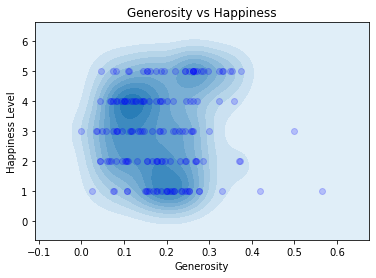

In [62]:
sns.kdeplot(data=mergedata['Generosity'],data2=mergedata['Happiness_level'],shade=True)
plt.scatter(x=mergedata['Generosity'],y=mergedata['Happiness_level'],alpha=0.2,color='blue')
plt.xlabel('Generosity')
plt.ylabel('Happiness Level')
plt.title('Generosity vs Happiness')

Text(0.5, 1.0, 'Corruption vs Happiness')

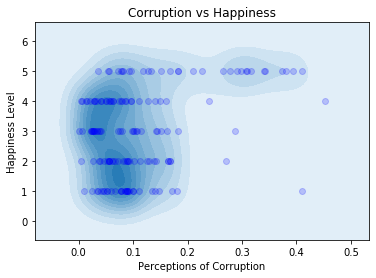

In [63]:
sns.kdeplot(data=mergedata['Perceptions of corruption'],data2=mergedata['Happiness_level'],shade=True)
plt.scatter(x=mergedata['Perceptions of corruption'],y=mergedata['Happiness_level'],alpha=0.2,color='blue')
plt.xlabel('Perceptions of Corruption')
plt.ylabel('Happiness Level')
plt.title('Corruption vs Happiness')

Text(0.5, 1.0, 'Region vs Happiness')

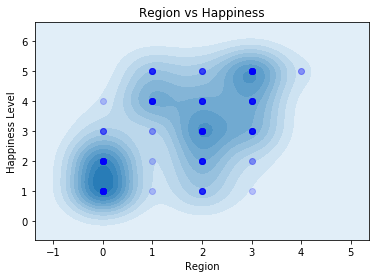

In [64]:
sns.kdeplot(data=mergedata['region'],data2=mergedata['Happiness_level'],shade=True)
plt.scatter(x=mergedata['region'],y=mergedata['Happiness_level'],alpha=0.2,color='blue')
plt.xlabel('Region')
plt.ylabel('Happiness Level')
plt.title('Region vs Happiness')

An exploratory data analysis was conducted to determine any relationships between independent variables and the target variable (Happiness Level). When visualizing the data, it is interesting to note that GDP per capita, social support and healthy life expectancy seem to have a high positive correlation with happiness level, whereas the other variables are less significant. In the next section, these relationships are quantified with a seaborn heatmap.

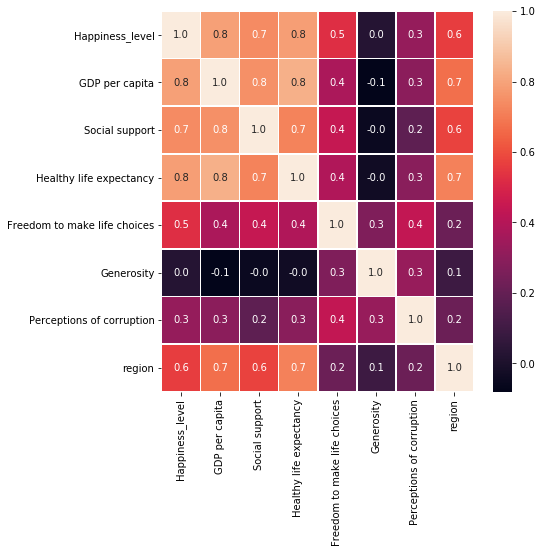

In [65]:
f,ax = plt.subplots(figsize = (7,7))
sns.heatmap(mergedata.corr(),annot=True,linewidths=0.7,fmt='.1f',ax=ax)
plt.show()

From the heatmap, GDP per capita (health of the economy), social support and healthy life expectancy indeed have the highest correlation to happiness in comparison to other variables (>0.7). Even though region does display a somewhat high correlation, it is important to note that is driven by an outlier, as seen in the prior scatter graph.

### Question 2: Examine features that predict happiness categories using one or more models that allow for automatic feature selection
Explain any meaningful findings

In [67]:
# set up training and test data
y=mergedata['Happiness_level']

X=mergedata.drop(['Happiness_level'],axis=1)
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

print(X_train.shape)
print(y_train.shape)
print(X_train.columns.tolist())

(117, 7)
(117,)
['GDP per capita', 'Social support', 'Healthy life expectancy', 'Freedom to make life choices', 'Generosity', 'Perceptions of corruption', 'region']


In [68]:
# scaling the data using Standard Scaler
scaler = preprocessing.StandardScaler()
scaler.fit(X_train)
X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [69]:
# fitting a random forest classifier and utilizing SelectFromModel for automatic feature selection
forest = RandomForestClassifier(n_estimators=100)
formodel = forest.fit(X_train_scaled, y_train)

print(formodel.feature_importances_)

[0.21474423 0.17856864 0.17622595 0.13791319 0.09957097 0.13727019
 0.05570683]


In [70]:
# using recursive feature elmination on heavily penalized logistic regression with a penalized term of l1
estimator = LogisticRegression(C=1e90,penalty='l1',solver='saga').fit(X_train_scaled, y_train) #model with all X variables
selector = RFE(estimator, 3, step=1) # step tells RFE how many features to remove each time model features are evaluated

selector = selector.fit(X_train_scaled, y_train) # fit RFE estimator.
print("Num Features: %d" % selector.n_features_)
print("Selected Features: %s" % selector.support_)# T/F for top five features
print("Feature Ranking: %s" % selector.ranking_)  # ranking for top five + features

Num Features: 3
Selected Features: [False  True  True  True False False False]
Feature Ranking: [2 1 1 1 3 5 4]


C:\Users\jaeha\Anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
C:\Users\jaeha\Anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
C:\Users\jaeha\Anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
C:\Users\jaeha\Anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)
C:\Users\jaeha\Anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did 

Based on the feature importance results from the first model, it seems that the same 3 variables hold significant importance in relation to happiness level, as was shared by the sns heatmap. These variables are GDP per capita, social support and healthy life expectancy. Although the second model shared a minor discrepancy in the ranking of the variables, it was still very similar to the results of the sns heatmap and the first model (with only the GDP per capita being ranked second, instead of first).

### Question 3: Run at least three prediction models to try to predict World Happiness well.
Discuss which models performed better and point out relevant hyper-parameter values for successful models. Submit your best model to the leader board for the World Happiness AI Model Share competition.

In [71]:
# reload the data
data=pd.read_csv("C:/Users/jaeha/Documents/Columbia/Spring 2020/AdvancedML/MiniHackathon_WorldHappiness/worldhappiness2019.csv")

regiondata=pd.read_csv("C:/Users/jaeha/Documents/Columbia/Spring 2020/AdvancedML/MiniHackathon_WorldHappiness/region.csv")


mergedata=pd.merge(data, regiondata, how='left', left_on='Country or region', right_on='name')
# Check for missing values
mergedata.loc[pd.isnull(mergedata).iloc[:,9]].to_csv("missing.csv",index=False)

# clean up final region data for only variables of interest
mergedata = mergedata.drop(['name'],axis=1)
mergedata = mergedata.drop(['Country or region'],axis=1)
mergedata = mergedata.drop(['sub-region'],axis=1)
mergedata.head()

,Happiness_level,GDP per capita,Social support,Healthy life expectancy,Freedom to make life choices,Generosity,Perceptions of corruption,region
0,Very High,1.340,1.587,0.986,0.596,0.153,0.393,Europe
1,Very High,1.383,1.573,0.996,0.592,0.252,0.410,Europe
2,Very High,1.488,1.582,1.028,0.603,0.271,0.341,Europe
3,Very High,1.380,1.624,1.026,0.591,0.354,0.118,Europe
4,Very High,1.396,1.522,0.999,0.557,0.322,0.298,Europe


In [72]:
# train and split the data
y=mergedata['Happiness_level']
X=mergedata.drop(['Happiness_level'],axis=1)
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

print(X_train.shape)
print(y_train.shape)
print(X_train.columns.tolist())

(117, 7)
(117,)
['GDP per capita', 'Social support', 'Healthy life expectancy', 'Freedom to make life choices', 'Generosity', 'Perceptions of corruption', 'region']


In [73]:
# Preprocessing pipelines for both numeric and categorical data.

numeric_features=X.columns.tolist()
numeric_features.remove('region')

numeric_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='median')),
    ('scaler', StandardScaler())])

categorical_features = ['region']

# Replacing missing values with Modal value and then one hot encoding.
categorical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='most_frequent')),
    ('onehot', OneHotEncoder(handle_unknown='ignore'))])

# Final preprocessor object set up with ColumnTransformer

preprocessor = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, numeric_features),
        ('cat', categorical_transformer, categorical_features)])


# Fitting preprocessor object
prediction_input_preprocessor=preprocessor.fit(X_train) 

pickle.dump(prediction_input_preprocessor, open( "preprocessor.pkl", "wb" ) )
prediction_input_preprocessor.transform(X_train).shape # pretty small dataset

(117, 11)

In [74]:
def model_eval_metrics(y_true, y_pred,classification="TRUE"):
     if classification=="TRUE":
        accuracy_eval = accuracy_score(y_true, y_pred)
        f1_score_eval = f1_score(y_true, y_pred,average="macro",zero_division=0)
        precision_eval = precision_score(y_true, y_pred,average="macro",zero_division=0)
        recall_eval = recall_score(y_true, y_pred,average="macro",zero_division=0)
        mse_eval = 0
        rmse_eval = 0
        mae_eval = 0
        r2_eval = 0
        metricdata = {'accuracy': [accuracy_eval], 'f1_score': [f1_score_eval], 'precision': [precision_eval], 'recall': [recall_eval], 'mse': [mse_eval], 'rmse': [rmse_eval], 'mae': [mae_eval], 'r2': [r2_eval]}
        finalmetricdata = pd.DataFrame.from_dict(metricdata)
     else:
        accuracy_eval = 0
        f1_score_eval = 0
        precision_eval = 0
        recall_eval = 0
        mse_eval = mean_squared_error(y_true, y_pred)
        rmse_eval = sqrt(mean_squared_error(y_true, y_pred))
        mae_eval = mean_absolute_error(y_true, y_pred)
        r2_eval = r2_score(y_true, y_pred)
        metricdata = {'accuracy': [accuracy_eval], 'f1_score': [f1_score_eval], 'precision': [precision_eval], 'recall': [recall_eval], 'mse': [mse_eval], 'rmse': [rmse_eval], 'mae': [mae_eval], 'r2': [r2_eval]}
        finalmetricdata = pd.DataFrame.from_dict(metricdata)
     return finalmetricdata


#### First Model: Neural Network using Keras

In [76]:
# tuning parameters for number of hidden layers and hidden units of keras model
def create_model(hidden_units1=64,hidden_units2=64,optimizer='sgd',hidden_layers=1,activation = 'relu'):  
    model = Sequential()
    model.add(Dense(units=hidden_units1, input_dim=11, activation=activation))
    
    for i in range(hidden_layers):
        model.add(Dense(units=hidden_units2,activation=activation))
    
    model.add(Dense(units=5, activation='softmax'))
    model.compile(loss='categorical_crossentropy', optimizer=optimizer, metrics=['accuracy'])
    return model

model = KerasClassifier(build_fn=create_model,epochs=100,batch_size=10,verbose=0)
hidden_units1 = [32,64,128,256,512]
hidden_units2 = [32,64,128,256,512]
hidden_layers = [1,2,3,4,5]
param_grid = dict(hidden_units1=hidden_units1,hidden_units2=hidden_units2,hidden_layers=hidden_layers)
grid = GridSearchCV(estimator=model,param_grid=param_grid,n_jobs=-1)
grid_result = grid.fit(prediction_input_preprocessor.transform(X_train), pd.get_dummies(y_train))

C:\Users\jaeha\Anaconda3\lib\site-packages\joblib\externals\loky\process_executor.py:706: UserWarning: A worker stopped while some jobs were given to the executor. This can be caused by a too short worker timeout or by a memory leak.
  "timeout or by a memory leak.", UserWarning


In [77]:
print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))
means = grid_result.cv_results_['mean_test_score']
stds = grid_result.cv_results_['std_test_score']
params = grid_result.cv_results_['params']
for mean, stdev, param in zip(means, stds, params):
    print("%f (%f) with: %r" % (mean, stdev, param))

Best: 0.634058 using {'hidden_layers': 3, 'hidden_units1': 512, 'hidden_units2': 32}
0.574275 (0.124123) with: {'hidden_layers': 1, 'hidden_units1': 32, 'hidden_units2': 32}
0.591667 (0.109031) with: {'hidden_layers': 1, 'hidden_units1': 32, 'hidden_units2': 64}
0.591304 (0.111189) with: {'hidden_layers': 1, 'hidden_units1': 32, 'hidden_units2': 128}
0.582971 (0.098110) with: {'hidden_layers': 1, 'hidden_units1': 32, 'hidden_units2': 256}
0.590580 (0.088860) with: {'hidden_layers': 1, 'hidden_units1': 32, 'hidden_units2': 512}
0.607971 (0.060721) with: {'hidden_layers': 1, 'hidden_units1': 64, 'hidden_units2': 32}
0.582246 (0.077231) with: {'hidden_layers': 1, 'hidden_units1': 64, 'hidden_units2': 64}
0.609058 (0.129284) with: {'hidden_layers': 1, 'hidden_units1': 64, 'hidden_units2': 128}
0.590942 (0.106132) with: {'hidden_layers': 1, 'hidden_units1': 64, 'hidden_units2': 256}
0.582246 (0.094811) with: {'hidden_layers': 1, 'hidden_units1': 64, 'hidden_units2': 512}
0.530435 (0.055464)

In [78]:
# tuning parameters for learning rate and momentum of SGD optimizer
def create_model(hidden_units1=512,hidden_units2=32,hidden_layers=3,activation = 'relu',learn_rate=0.01, momentum=0):  
    model = Sequential()
    model.add(Dense(units=hidden_units1, input_dim=11, activation=activation))
    
    for i in range(hidden_layers):
        model.add(Dense(units=hidden_units2,activation=activation))
    
    model.add(Dense(units=5, activation='softmax'))
    
    optimizer = SGD(lr=learn_rate, momentum=momentum)
    model.compile(loss='categorical_crossentropy', optimizer=optimizer, metrics=['accuracy'])
    return model

model = KerasClassifier(build_fn=create_model,epochs=100,batch_size=10,verbose=0)
learn_rate = [0.001, 0.01, 0.1, 0.2, 0.3]
momentum = [0.0, 0.2, 0.4, 0.6, 0.8, 0.9]
param_grid = dict(learn_rate=learn_rate, momentum=momentum)
grid = GridSearchCV(estimator=model,param_grid=param_grid,n_jobs=-1)
grid_result = grid.fit(prediction_input_preprocessor.transform(X_train), pd.get_dummies(y_train))

C:\Users\jaeha\Anaconda3\lib\site-packages\joblib\externals\loky\process_executor.py:706: UserWarning: A worker stopped while some jobs were given to the executor. This can be caused by a too short worker timeout or by a memory leak.
  "timeout or by a memory leak.", UserWarning


In [79]:
print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))
means = grid_result.cv_results_['mean_test_score']
stds = grid_result.cv_results_['std_test_score']
params = grid_result.cv_results_['params']
for mean, stdev, param in zip(means, stds, params):
    print("%f (%f) with: %r" % (mean, stdev, param))

Best: 0.624638 using {'learn_rate': 0.001, 'momentum': 0.9}
0.428623 (0.113768) with: {'learn_rate': 0.001, 'momentum': 0.0}
0.428261 (0.081732) with: {'learn_rate': 0.001, 'momentum': 0.2}
0.461957 (0.098214) with: {'learn_rate': 0.001, 'momentum': 0.4}
0.514493 (0.098268) with: {'learn_rate': 0.001, 'momentum': 0.6}
0.574638 (0.155174) with: {'learn_rate': 0.001, 'momentum': 0.8}
0.624638 (0.092936) with: {'learn_rate': 0.001, 'momentum': 0.9}
0.581522 (0.066690) with: {'learn_rate': 0.01, 'momentum': 0.0}
0.581522 (0.037723) with: {'learn_rate': 0.01, 'momentum': 0.2}
0.539130 (0.057352) with: {'learn_rate': 0.01, 'momentum': 0.4}
0.505435 (0.093124) with: {'learn_rate': 0.01, 'momentum': 0.6}
0.504348 (0.041415) with: {'learn_rate': 0.01, 'momentum': 0.8}
0.453261 (0.071611) with: {'learn_rate': 0.01, 'momentum': 0.9}
0.496739 (0.059341) with: {'learn_rate': 0.1, 'momentum': 0.0}
0.478623 (0.030495) with: {'learn_rate': 0.1, 'momentum': 0.2}
0.453623 (0.102438) with: {'learn_rate':

In [80]:
# tuning parameter for weight initialization

def create_model(hidden_units1=512,hidden_units2=32,hidden_layers=3,activation = 'relu',learn_rate=0.001, momentum=0.9, init_mode='uniform'):  
    model = Sequential()
    model.add(Dense(units=hidden_units1, input_dim=11, kernel_initializer=init_mode, activation=activation))
    
    for i in range(hidden_layers):
        model.add(Dense(units=hidden_units2, kernel_initializer=init_mode, activation=activation))
    
    model.add(Dense(units=5, activation='softmax'))
    
    optimizer = SGD(lr=learn_rate, momentum=momentum)
    model.compile(loss='categorical_crossentropy', optimizer=optimizer, metrics=['accuracy'])
    return model

model = KerasClassifier(build_fn=create_model,epochs=100,batch_size=10,verbose=0)

init_mode = ['uniform', 'lecun_uniform', 'normal', 'zero', 'glorot_normal', 'glorot_uniform', 'he_normal', 'he_uniform']
param_grid = dict(init_mode=init_mode)
grid = GridSearchCV(estimator=model,param_grid=param_grid,n_jobs=-1)
grid_result = grid.fit(prediction_input_preprocessor.transform(X_train), pd.get_dummies(y_train))

C:\Users\jaeha\Anaconda3\lib\site-packages\joblib\externals\loky\process_executor.py:706: UserWarning: A worker stopped while some jobs were given to the executor. This can be caused by a too short worker timeout or by a memory leak.
  "timeout or by a memory leak.", UserWarning


In [81]:
print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))
means = grid_result.cv_results_['mean_test_score']
stds = grid_result.cv_results_['std_test_score']
params = grid_result.cv_results_['params']
for mean, stdev, param in zip(means, stds, params):
    print("%f (%f) with: %r" % (mean, stdev, param))

Best: 0.573913 using {'init_mode': 'glorot_normal'}
0.152899 (0.054728) with: {'init_mode': 'uniform'}
0.512681 (0.085295) with: {'init_mode': 'lecun_uniform'}
0.342391 (0.031958) with: {'init_mode': 'normal'}
0.152899 (0.054728) with: {'init_mode': 'zero'}
0.573913 (0.073528) with: {'init_mode': 'glorot_normal'}
0.547826 (0.092640) with: {'init_mode': 'glorot_uniform'}
0.488768 (0.087726) with: {'init_mode': 'he_normal'}
0.539493 (0.085957) with: {'init_mode': 'he_uniform'}


In [82]:
# tuning parameter for activation method of keras model

def create_model(hidden_units1=512,hidden_units2=32,hidden_layers=3,activation = 'relu',learn_rate=0.001, momentum=0.9, init_mode='glorot_normal'):  
    model = Sequential()
    model.add(Dense(units=hidden_units1, input_dim=11, kernel_initializer=init_mode, activation=activation))
    
    for i in range(hidden_layers):
        model.add(Dense(units=hidden_units2, kernel_initializer=init_mode, activation=activation))
    
    model.add(Dense(units=5, activation='softmax'))
    
    optimizer = SGD(lr=learn_rate, momentum=momentum)
    model.compile(loss='categorical_crossentropy', optimizer=optimizer, metrics=['accuracy'])
    return model

model = KerasClassifier(build_fn=create_model,epochs=100,batch_size=10,verbose=0)

activation = ['softmax', 'softplus', 'softsign', 'relu', 'tanh', 'sigmoid', 'hard_sigmoid', 'linear']
param_grid = dict(activation=activation)
grid = GridSearchCV(estimator=model,param_grid=param_grid,n_jobs=-1)
grid_result = grid.fit(prediction_input_preprocessor.transform(X_train), pd.get_dummies(y_train))

C:\Users\jaeha\Anaconda3\lib\site-packages\joblib\externals\loky\process_executor.py:706: UserWarning: A worker stopped while some jobs were given to the executor. This can be caused by a too short worker timeout or by a memory leak.
  "timeout or by a memory leak.", UserWarning


In [83]:
print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))
means = grid_result.cv_results_['mean_test_score']
stds = grid_result.cv_results_['std_test_score']
params = grid_result.cv_results_['params']
for mean, stdev, param in zip(means, stds, params):
    print("%f (%f) with: %r" % (mean, stdev, param))

Best: 0.582609 using {'activation': 'relu'}
0.178986 (0.067419) with: {'activation': 'softmax'}
0.575000 (0.114148) with: {'activation': 'softplus'}
0.582246 (0.077231) with: {'activation': 'softsign'}
0.582609 (0.069293) with: {'activation': 'relu'}
0.556522 (0.048804) with: {'activation': 'tanh'}
0.152899 (0.054728) with: {'activation': 'sigmoid'}
0.152899 (0.054728) with: {'activation': 'hard_sigmoid'}
0.513768 (0.067138) with: {'activation': 'linear'}


In [96]:
optimizer = SGD(lr=0.001, momentum=0.9)
model = Sequential()
model.add(Dense(units= 512, activation='relu', kernel_initializer='glorot_normal',input_dim=11))
model.add(Dense(units= 32, activation='relu', kernel_initializer='glorot_normal'))
model.add(Dense(units= 32, activation='relu', kernel_initializer='glorot_normal'))
model.add(Dense(units= 32, activation='relu',kernel_initializer='glorot_normal'))
model.add(Dense(units=5, activation='softmax'))
model.compile(optimizer=optimizer,loss='categorical_crossentropy', metrics=['accuracy'])
model.fit(prediction_input_preprocessor.transform(X_train), pd.get_dummies(y_train),batch_size = 10,epochs = 100)  

Train on 93 samples, validate on 24 samples
Epoch 1/100
93/93 [==============================] - 1s 14ms/step - loss: 1.6081 - acc: 0.3011 - val_loss: 1.6151 - val_acc: 0.2083
Epoch 2/100
93/93 [==============================] - 0s 590us/step - loss: 1.6044 - acc: 0.3226 - val_loss: 1.6129 - val_acc: 0.2083
Epoch 3/100
93/93 [==============================] - 0s 643us/step - loss: 1.5997 - acc: 0.3118 - val_loss: 1.6111 - val_acc: 0.2083
Epoch 4/100
93/93 [==============================] - 0s 601us/step - loss: 1.5939 - acc: 0.3441 - val_loss: 1.6090 - val_acc: 0.1250
Epoch 5/100
93/93 [==============================] - 0s 472us/step - loss: 1.5891 - acc: 0.3226 - val_loss: 1.6058 - val_acc: 0.1250
Epoch 6/100
93/93 [==============================] - 0s 826us/step - loss: 1.5843 - acc: 0.3333 - val_loss: 1.6023 - val_acc: 0.1250
Epoch 7/100
93/93 [==============================] - 0s 622us/step - loss: 1.5787 - acc: 0.3011 - val_loss: 1.6000 - val_acc: 0.1667
Epoch 8/100
93/93 [=======

Epoch 62/100
93/93 [==============================] - 0s 515us/step - loss: 0.8477 - acc: 0.6989 - val_loss: 1.1121 - val_acc: 0.6250
Epoch 63/100
93/93 [==============================] - 0s 719us/step - loss: 0.8405 - acc: 0.7097 - val_loss: 1.1112 - val_acc: 0.6250
Epoch 64/100
93/93 [==============================] - 0s 418us/step - loss: 0.8331 - acc: 0.6989 - val_loss: 1.1122 - val_acc: 0.6250
Epoch 65/100
93/93 [==============================] - 0s 707us/step - loss: 0.8248 - acc: 0.6882 - val_loss: 1.1024 - val_acc: 0.6250
Epoch 66/100
93/93 [==============================] - 0s 365us/step - loss: 0.8196 - acc: 0.6667 - val_loss: 1.0963 - val_acc: 0.6250
Epoch 67/100
93/93 [==============================] - 0s 461us/step - loss: 0.8091 - acc: 0.6774 - val_loss: 1.1078 - val_acc: 0.6667
Epoch 68/100
93/93 [==============================] - 0s 418us/step - loss: 0.8002 - acc: 0.7204 - val_loss: 1.1087 - val_acc: 0.6667
Epoch 69/100
93/93 [==============================] - 0s 268us

In [97]:
# using predict_classes() for multi-class data to return predicted class index.

print(model.predict_classes(prediction_input_preprocessor.transform(X_test)))

prediction_index=model.predict_classes(prediction_input_preprocessor.transform(X_test))

#Now lets run some code to get keras to return the label rather than the index...

# get labels from one hot encoded y_train data
labels=pd.get_dummies(y_train).columns

# Function to use to return label from column index location
def index_to_label(labels,index_n): 
    return labels[index_n]
    
# Example: return label at predicted index location 1
index_to_label(labels,1)

# Iterate through all predicted indices using map method

predicted_labels=list(map(lambda x: labels[x], prediction_index))
print(predicted_labels)

[1 0 0 1 4 1 0 0 0 2 1 0 3 2 1 1 4 4 4 0 4 3 1 3 1 2 0 1 1 4 0 2 1 4 2 4 4
 2 1]
['High', 'Average', 'Average', 'High', 'Very Low', 'High', 'Average', 'Average', 'Average', 'Low', 'High', 'Average', 'Very High', 'Low', 'High', 'High', 'Very Low', 'Very Low', 'Very Low', 'Average', 'Very Low', 'Very High', 'High', 'Very High', 'High', 'Low', 'Average', 'High', 'High', 'Very Low', 'Average', 'Low', 'High', 'Very Low', 'Low', 'Very Low', 'Very Low', 'Low', 'High']


In [98]:
modelevalobject=model_eval_metrics(y_test,predicted_labels,classification="TRUE")
modelevalobject

,accuracy,f1_score,precision,recall,mse,rmse,mae,r2
0,0.512821,0.508829,0.572222,0.536111,0,0,0,0


#### Second Model: Random Forest Classifier

In [246]:
model=RandomForestClassifier(n_estimators=1000, random_state = 0)
param_grid = {
    'n_estimators': [400, 700, 1000],
    'max_depth': [15,20,25],
    'max_leaf_nodes': [50, 100, 200]
}
grid = GridSearchCV(estimator=model,param_grid=param_grid)
grid_result = grid.fit(prediction_input_preprocessor.transform(X_train), pd.get_dummies(y_train))

In [247]:
print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))
means = grid_result.cv_results_['mean_test_score']
stds = grid_result.cv_results_['std_test_score']
params = grid_result.cv_results_['params']
for mean, stdev, param in zip(means, stds, params):
    print("%f (%f) with: %r" % (mean, stdev, param))

Best: 0.394203 using {'max_depth': 15, 'max_leaf_nodes': 50, 'n_estimators': 400}
0.394203 (0.049700) with: {'max_depth': 15, 'max_leaf_nodes': 50, 'n_estimators': 400}
0.376812 (0.038888) with: {'max_depth': 15, 'max_leaf_nodes': 50, 'n_estimators': 700}
0.385145 (0.032641) with: {'max_depth': 15, 'max_leaf_nodes': 50, 'n_estimators': 1000}
0.394203 (0.049700) with: {'max_depth': 15, 'max_leaf_nodes': 100, 'n_estimators': 400}
0.376812 (0.038888) with: {'max_depth': 15, 'max_leaf_nodes': 100, 'n_estimators': 700}
0.385145 (0.032641) with: {'max_depth': 15, 'max_leaf_nodes': 100, 'n_estimators': 1000}
0.394203 (0.049700) with: {'max_depth': 15, 'max_leaf_nodes': 200, 'n_estimators': 400}
0.376812 (0.038888) with: {'max_depth': 15, 'max_leaf_nodes': 200, 'n_estimators': 700}
0.385145 (0.032641) with: {'max_depth': 15, 'max_leaf_nodes': 200, 'n_estimators': 1000}
0.394203 (0.049700) with: {'max_depth': 20, 'max_leaf_nodes': 50, 'n_estimators': 400}
0.376812 (0.038888) with: {'max_depth':

In [248]:
model=RandomForestClassifier(n_estimators=400, max_depth=15, max_leaf_nodes=50, random_state = 0)
model.fit(prediction_input_preprocessor.transform(X_train), y_train)
y_pred=model.predict(prediction_input_preprocessor.transform(X_test))
modelevalobject=model_eval_metrics(y_test,y_pred,classification="TRUE")
modelevalobject

,accuracy,f1_score,precision,recall,mse,rmse,mae,r2
0,0.358974,0.372816,0.45,0.369444,0,0,0,0


#### Third Model: K Neighbors Classifier

In [264]:
n_neighbors = np.arange(1, 30, 2)
weights = ['uniform', 'distance']
metric = ['euclidean','manhattan']
param_grid = dict(n_neighbors=n_neighbors,weights=weights,metric=metric) #np.arange creates sequence of numbers for each k value

grid = GridSearchCV(KNeighborsClassifier(), param_grid=param_grid, cv=10)

#use meta model methods to fit score and predict model:
grid.fit(prediction_input_preprocessor.transform(X_train), y_train)

#extract best score and parameter by calling objects "best_score_" and "best_params_"
print("best mean cross-validation score: {:.3f}".format(grid.best_score_))
print("best parameters: {}".format(grid.best_params_))
print("test-set score: {:.3f}".format(grid.score(prediction_input_preprocessor.transform(X_test), y_test)))

best mean cross-validation score: 0.616
best parameters: {'metric': 'euclidean', 'n_neighbors': 21, 'weights': 'distance'}
test-set score: 0.436


In [266]:
model=KNeighborsClassifier(n_neighbors=21,weights='distance',metric='euclidean')
model.fit(prediction_input_preprocessor.transform(X_train), y_train)
y_pred=model.predict(prediction_input_preprocessor.transform(X_test))
modelevalobject=model_eval_metrics(y_test,y_pred,classification="TRUE")
modelevalobject

,accuracy,f1_score,precision,recall,mse,rmse,mae,r2
0,0.435897,0.429269,0.555556,0.469444,0,0,0,0


Based on the evaluation metrics, these are the summarized results of the three models:
<br>
<br>
1) Keras Neural Network
<br>
accuracy: 0.512821
<br>
f1_score: 0.508829
<br>
precision: 0.572222
<br>
recall: 0.536111
<br>
<br>
2) Random Forest Classifier
<br>
accuracy: 0.358974
<br>
f1_score: 0.372816
<br>
precision: 0.45
<br>
recall: 0.369444
<br>
<br>
3) K Neighbors Classifier
<br>
accuracy: 0.435897
<br>
f1_score: 0.429269
<br>
precision: 0.555556
<br>
recall: 0.469444
<br>
<br>
As such, the neural network outperformed the other models. The relevant parameters for each model was tuned using GridSearchCV. For Keras, the number of hidden layers, number of hidden units, learning rate and momentum of SGD optimizer, weight intialization and activation method were tuned. It is important to note that the paramters for Keras was tuned step by step, as tuning all relevant parameters at the same time was too cost intensive and time consuming when utilizing GridSearchCV. For random forest classifier, the number of trees, maximum depth of the tree and max leaf nodes were tuned. For K Neighbors Classifier, the number of neighbors, weight function and the distance metric were tuned.

### Extra Credit: Improvement of keras model using recently learned class concepts

In [126]:
# tuning parameters for number of hidden layers and hidden units of keras model
def create_model(hidden_units1=64,hidden_units2=64,hidden_layers=1,activation = 'relu'):
    opt = SGD(lr=0.01)
    model = Sequential()
    model.add(Dense(units=hidden_units1, input_dim=11, activation=activation,kernel_regularizer=l2(0.01), bias_regularizer=l2(0.01)))
    
    for i in range(hidden_layers):
        model.add(Dense(units=hidden_units2,activation=activation, kernel_regularizer=l2(0.01), bias_regularizer=l2(0.01)))
    
    model.add(Dense(units=5, activation='softmax'))
    model.compile(loss='categorical_crossentropy', optimizer=opt, metrics=['accuracy'])
    return model

model = KerasClassifier(build_fn=create_model,epochs=100,batch_size=10,verbose=0)
hidden_units1 = [32,64,128,256,512]
hidden_units2 = [32,64,128,256,512]
hidden_layers = [1,2,3,4,5]
param_grid = dict(hidden_units1=hidden_units1,hidden_units2=hidden_units2,hidden_layers=hidden_layers)
grid = GridSearchCV(estimator=model,param_grid=param_grid,n_jobs=-1)
grid_result = grid.fit(prediction_input_preprocessor.transform(X_train), pd.get_dummies(y_train))

C:\Users\jaeha\Anaconda3\lib\site-packages\joblib\externals\loky\process_executor.py:706: UserWarning: A worker stopped while some jobs were given to the executor. This can be caused by a too short worker timeout or by a memory leak.
  "timeout or by a memory leak.", UserWarning


In [127]:
print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))
means = grid_result.cv_results_['mean_test_score']
stds = grid_result.cv_results_['std_test_score']
params = grid_result.cv_results_['params']
for mean, stdev, param in zip(means, stds, params):
    print("%f (%f) with: %r" % (mean, stdev, param))

Best: 0.659783 using {'hidden_layers': 5, 'hidden_units1': 64, 'hidden_units2': 64}
0.581884 (0.063570) with: {'hidden_layers': 1, 'hidden_units1': 32, 'hidden_units2': 32}
0.582609 (0.088465) with: {'hidden_layers': 1, 'hidden_units1': 32, 'hidden_units2': 64}
0.599638 (0.136676) with: {'hidden_layers': 1, 'hidden_units1': 32, 'hidden_units2': 128}
0.565217 (0.059931) with: {'hidden_layers': 1, 'hidden_units1': 32, 'hidden_units2': 256}
0.600362 (0.133339) with: {'hidden_layers': 1, 'hidden_units1': 32, 'hidden_units2': 512}
0.590580 (0.074606) with: {'hidden_layers': 1, 'hidden_units1': 64, 'hidden_units2': 32}
0.573551 (0.071070) with: {'hidden_layers': 1, 'hidden_units1': 64, 'hidden_units2': 64}
0.617029 (0.090039) with: {'hidden_layers': 1, 'hidden_units1': 64, 'hidden_units2': 128}
0.573913 (0.087253) with: {'hidden_layers': 1, 'hidden_units1': 64, 'hidden_units2': 256}
0.556884 (0.084999) with: {'hidden_layers': 1, 'hidden_units1': 64, 'hidden_units2': 512}
0.608333 (0.111064) 

In [142]:
# tuning parameters for learning rate
def create_model(hidden_units1=64,hidden_units2=64,hidden_layers=5,activation = 'relu', learn_rate=0.01):
    opt = SGD(lr=learn_rate)
    model = Sequential()
    model.add(Dense(units=hidden_units1, input_dim=11, activation=activation,kernel_regularizer=l2(0.01), bias_regularizer=l2(0.01)))
    
    for i in range(hidden_layers):
        model.add(Dense(units=hidden_units2,activation=activation, kernel_regularizer=l2(0.01), bias_regularizer=l2(0.01)))
    
    model.add(Dense(units=5, activation='softmax'))
    model.compile(loss='categorical_crossentropy', optimizer=opt, metrics=['accuracy'])
    return model

model = KerasClassifier(build_fn=create_model,epochs=100,batch_size=10,verbose=0)
learn_rate = [0.001, 0.01, 0.1, 0.2, 0.3]
param_grid = dict(learn_rate=learn_rate)
grid = GridSearchCV(estimator=model,param_grid=param_grid,n_jobs=-1)
grid_result = grid.fit(prediction_input_preprocessor.transform(X_train), pd.get_dummies(y_train))

C:\Users\jaeha\Anaconda3\lib\site-packages\joblib\externals\loky\process_executor.py:706: UserWarning: A worker stopped while some jobs were given to the executor. This can be caused by a too short worker timeout or by a memory leak.
  "timeout or by a memory leak.", UserWarning


In [143]:
print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))
means = grid_result.cv_results_['mean_test_score']
stds = grid_result.cv_results_['std_test_score']
params = grid_result.cv_results_['params']
for mean, stdev, param in zip(means, stds, params):
    print("%f (%f) with: %r" % (mean, stdev, param))

Best: 0.607971 using {'learn_rate': 0.01}
0.348913 (0.114973) with: {'learn_rate': 0.001}
0.607971 (0.077171) with: {'learn_rate': 0.01}
0.487319 (0.065197) with: {'learn_rate': 0.1}
0.469928 (0.085369) with: {'learn_rate': 0.2}
0.301087 (0.169372) with: {'learn_rate': 0.3}


In [144]:
# tuning parameters for dropout rate
def create_model(hidden_units1=64,hidden_units2=64,hidden_layers=5,activation = 'relu', learn_rate=0.01, dropout_rate=0.0):
    opt = SGD(lr=learn_rate)
    model = Sequential()
    model.add(Dense(units=hidden_units1, input_dim=11, activation=activation,kernel_regularizer=l2(0.01), bias_regularizer=l2(0.01)))
    model.add(Dropout(dropout_rate))
    
    for i in range(hidden_layers):
        model.add(Dense(units=hidden_units2,activation=activation, kernel_regularizer=l2(0.01), bias_regularizer=l2(0.01)))
        model.add(Dropout(dropout_rate))
        
    model.add(Dense(units=5, activation='softmax'))
    model.compile(loss='categorical_crossentropy', optimizer=opt, metrics=['accuracy'])
    return model

model = KerasClassifier(build_fn=create_model,epochs=100,batch_size=10,verbose=0)
dropout_rate = [0.0, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9]
param_grid = dict(dropout_rate=dropout_rate)
grid = GridSearchCV(estimator=model,param_grid=param_grid,n_jobs=-1)
grid_result = grid.fit(prediction_input_preprocessor.transform(X_train), pd.get_dummies(y_train))

C:\Users\jaeha\Anaconda3\lib\site-packages\joblib\externals\loky\process_executor.py:706: UserWarning: A worker stopped while some jobs were given to the executor. This can be caused by a too short worker timeout or by a memory leak.
  "timeout or by a memory leak.", UserWarning


In [145]:
print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))
means = grid_result.cv_results_['mean_test_score']
stds = grid_result.cv_results_['std_test_score']
params = grid_result.cv_results_['params']
for mean, stdev, param in zip(means, stds, params):
    print("%f (%f) with: %r" % (mean, stdev, param))

Best: 0.617029 using {'dropout_rate': 0.1}
0.573188 (0.049262) with: {'dropout_rate': 0.0}
0.617029 (0.093487) with: {'dropout_rate': 0.1}
0.564855 (0.120780) with: {'dropout_rate': 0.2}
0.530072 (0.044664) with: {'dropout_rate': 0.3}
0.503623 (0.062672) with: {'dropout_rate': 0.4}
0.289493 (0.154623) with: {'dropout_rate': 0.5}
0.256159 (0.092285) with: {'dropout_rate': 0.6}
0.152899 (0.054728) with: {'dropout_rate': 0.7}
0.187681 (0.056984) with: {'dropout_rate': 0.8}
0.222464 (0.050911) with: {'dropout_rate': 0.9}


In [158]:
opt = SGD(lr=0.01)

model = Sequential()
model.add(Dense(64, input_dim=11, activation='relu', kernel_regularizer=l2(0.01), bias_regularizer=l2(0.01)))
model.add(Dropout(.1))
model.add(Dense(64, activation='relu', kernel_regularizer=l2(0.01), bias_regularizer=l2(0.01)))
model.add(Dropout(.1))
model.add(Dense(64, activation='relu', kernel_regularizer=l2(0.01), bias_regularizer=l2(0.01)))
model.add(Dropout(.1))
model.add(Dense(64, activation='relu', kernel_regularizer=l2(0.01), bias_regularizer=l2(0.01)))
model.add(Dropout(.1))
model.add(Dense(64, activation='relu', kernel_regularizer=l2(0.01), bias_regularizer=l2(0.01)))
model.add(Dropout(.1))
model.add(Dense(64, activation='relu', kernel_regularizer=l2(0.01), bias_regularizer=l2(0.01)))
model.add(Dropout(.1))
model.add(Dense(5, activation='softmax')) 
                                            
# Compile model
model.compile(loss='categorical_crossentropy', optimizer=opt, metrics=['accuracy'])

# Save best model given maximum val_accuracy
es = EarlyStopping(monitor='val_loss', mode='min', verbose=1, patience=500)
mc = ModelCheckpoint('best_model.h5',monitor='val_acc', mode='max', verbose=1, save_best_only=True) # evaluating val_loss minimization

# Fitting the NN to the Training set
model.fit(prediction_input_preprocessor.transform(X_train), pd.get_dummies(y_train), 
          validation_data=(prediction_input_preprocessor.transform(X_test), pd.get_dummies(y_test)), epochs=1500, verbose=1, callbacks=[es,mc])

Train on 117 samples, validate on 39 samples
Epoch 1/1500
117/117 [==============================] - 4s 32ms/step - loss: 4.9894 - acc: 0.1368 - val_loss: 4.9725 - val_acc: 0.2051

Epoch 00001: val_acc improved from -inf to 0.20513, saving model to best_model.h5
Epoch 2/1500
117/117 [==============================] - 0s 486us/step - loss: 4.9775 - acc: 0.1795 - val_loss: 4.9659 - val_acc: 0.2308

Epoch 00002: val_acc improved from 0.20513 to 0.23077, saving model to best_model.h5
Epoch 3/1500
117/117 [==============================] - 0s 460us/step - loss: 4.9709 - acc: 0.1453 - val_loss: 4.9598 - val_acc: 0.2564

Epoch 00003: val_acc improved from 0.23077 to 0.25641, saving model to best_model.h5
Epoch 4/1500
117/117 [==============================] - 0s 648us/step - loss: 4.9687 - acc: 0.1880 - val_loss: 4.9536 - val_acc: 0.2051

Epoch 00004: val_acc did not improve from 0.25641
Epoch 5/1500
117/117 [==============================] - 0s 1ms/step - loss: 4.9524 - acc: 0.1966 - val_los


Epoch 00042: val_acc did not improve from 0.43590
Epoch 43/1500
117/117 [==============================] - 0s 299us/step - loss: 4.7043 - acc: 0.4444 - val_loss: 4.7160 - val_acc: 0.2821

Epoch 00043: val_acc did not improve from 0.43590
Epoch 44/1500
117/117 [==============================] - 0s 392us/step - loss: 4.7004 - acc: 0.4188 - val_loss: 4.7100 - val_acc: 0.3333

Epoch 00044: val_acc did not improve from 0.43590
Epoch 45/1500
117/117 [==============================] - 0s 929us/step - loss: 4.6987 - acc: 0.4274 - val_loss: 4.7036 - val_acc: 0.3077

Epoch 00045: val_acc did not improve from 0.43590
Epoch 46/1500
117/117 [==============================] - 0s 418us/step - loss: 4.6753 - acc: 0.4957 - val_loss: 4.6972 - val_acc: 0.3333

Epoch 00046: val_acc did not improve from 0.43590
Epoch 47/1500
117/117 [==============================] - 0s 333us/step - loss: 4.6882 - acc: 0.4103 - val_loss: 4.6909 - val_acc: 0.3333

Epoch 00047: val_acc did not improve from 0.43590
Epoch 48/

117/117 [==============================] - 0s 1ms/step - loss: 4.3475 - acc: 0.4957 - val_loss: 4.3841 - val_acc: 0.3846

Epoch 00086: val_acc did not improve from 0.43590
Epoch 87/1500
117/117 [==============================] - 0s 963us/step - loss: 4.3278 - acc: 0.4615 - val_loss: 4.3755 - val_acc: 0.3846

Epoch 00087: val_acc did not improve from 0.43590
Epoch 88/1500
117/117 [==============================] - 0s 427us/step - loss: 4.3073 - acc: 0.5128 - val_loss: 4.3667 - val_acc: 0.3846

Epoch 00088: val_acc did not improve from 0.43590
Epoch 89/1500
117/117 [==============================] - 0s 279us/step - loss: 4.3200 - acc: 0.4444 - val_loss: 4.3584 - val_acc: 0.3846

Epoch 00089: val_acc did not improve from 0.43590
Epoch 90/1500
117/117 [==============================] - 0s 699us/step - loss: 4.2839 - acc: 0.5299 - val_loss: 4.3507 - val_acc: 0.3846

Epoch 00090: val_acc did not improve from 0.43590
Epoch 91/1500
117/117 [==============================] - 0s 264us/step - los


Epoch 00128: val_acc did not improve from 0.53846
Epoch 129/1500
117/117 [==============================] - 0s 1ms/step - loss: 3.9497 - acc: 0.5385 - val_loss: 4.0266 - val_acc: 0.5385

Epoch 00129: val_acc did not improve from 0.53846
Epoch 130/1500
117/117 [==============================] - 0s 460us/step - loss: 3.9331 - acc: 0.5385 - val_loss: 4.0193 - val_acc: 0.5385

Epoch 00130: val_acc did not improve from 0.53846
Epoch 131/1500
117/117 [==============================] - 0s 401us/step - loss: 3.9365 - acc: 0.5299 - val_loss: 4.0131 - val_acc: 0.5385

Epoch 00131: val_acc did not improve from 0.53846
Epoch 132/1500
117/117 [==============================] - 0s 281us/step - loss: 3.9314 - acc: 0.5299 - val_loss: 4.0029 - val_acc: 0.5128

Epoch 00132: val_acc did not improve from 0.53846
Epoch 133/1500
117/117 [==============================] - 0s 239us/step - loss: 3.9218 - acc: 0.5983 - val_loss: 3.9959 - val_acc: 0.5128

Epoch 00133: val_acc did not improve from 0.53846
Epoch 


Epoch 00171: val_acc did not improve from 0.58974
Epoch 172/1500
117/117 [==============================] - 0s 349us/step - loss: 3.6633 - acc: 0.5641 - val_loss: 3.7368 - val_acc: 0.4872

Epoch 00172: val_acc did not improve from 0.58974
Epoch 173/1500
117/117 [==============================] - 0s 400us/step - loss: 3.6040 - acc: 0.6325 - val_loss: 3.7310 - val_acc: 0.5128

Epoch 00173: val_acc did not improve from 0.58974
Epoch 174/1500
117/117 [==============================] - 0s 366us/step - loss: 3.6456 - acc: 0.6068 - val_loss: 3.7251 - val_acc: 0.5128

Epoch 00174: val_acc did not improve from 0.58974
Epoch 175/1500
117/117 [==============================] - 0s 290us/step - loss: 3.6398 - acc: 0.5726 - val_loss: 3.7208 - val_acc: 0.4872

Epoch 00175: val_acc did not improve from 0.58974
Epoch 176/1500
117/117 [==============================] - 0s 324us/step - loss: 3.6006 - acc: 0.6325 - val_loss: 3.7152 - val_acc: 0.4872

Epoch 00176: val_acc did not improve from 0.58974
Epoc

117/117 [==============================] - 0s 342us/step - loss: 3.4009 - acc: 0.5983 - val_loss: 3.5265 - val_acc: 0.5128

Epoch 00215: val_acc did not improve from 0.58974
Epoch 216/1500
117/117 [==============================] - 0s 426us/step - loss: 3.4066 - acc: 0.5812 - val_loss: 3.5178 - val_acc: 0.5128

Epoch 00216: val_acc did not improve from 0.58974
Epoch 217/1500
117/117 [==============================] - 0s 273us/step - loss: 3.4355 - acc: 0.5726 - val_loss: 3.5166 - val_acc: 0.5128

Epoch 00217: val_acc did not improve from 0.58974
Epoch 218/1500
117/117 [==============================] - 0s 359us/step - loss: 3.3921 - acc: 0.6581 - val_loss: 3.5106 - val_acc: 0.5128

Epoch 00218: val_acc did not improve from 0.58974
Epoch 219/1500
117/117 [==============================] - 0s 307us/step - loss: 3.4048 - acc: 0.6154 - val_loss: 3.5104 - val_acc: 0.5128

Epoch 00219: val_acc did not improve from 0.58974
Epoch 220/1500
117/117 [==============================] - 0s 342us/ste

117/117 [==============================] - 0s 265us/step - loss: 3.2450 - acc: 0.5726 - val_loss: 3.3453 - val_acc: 0.5385

Epoch 00258: val_acc did not improve from 0.58974
Epoch 259/1500
117/117 [==============================] - 0s 273us/step - loss: 3.2162 - acc: 0.6581 - val_loss: 3.3456 - val_acc: 0.5385

Epoch 00259: val_acc did not improve from 0.58974
Epoch 260/1500
117/117 [==============================] - 0s 665us/step - loss: 3.2235 - acc: 0.5897 - val_loss: 3.3463 - val_acc: 0.5385

Epoch 00260: val_acc did not improve from 0.58974
Epoch 261/1500
117/117 [==============================] - 0s 427us/step - loss: 3.2159 - acc: 0.6410 - val_loss: 3.3419 - val_acc: 0.5385

Epoch 00261: val_acc did not improve from 0.58974
Epoch 262/1500
117/117 [==============================] - 0s 460us/step - loss: 3.2054 - acc: 0.6410 - val_loss: 3.3326 - val_acc: 0.5385

Epoch 00262: val_acc did not improve from 0.58974
Epoch 263/1500
117/117 [==============================] - 0s 231us/ste

117/117 [==============================] - 0s 307us/step - loss: 3.0390 - acc: 0.6068 - val_loss: 3.2031 - val_acc: 0.5385

Epoch 00301: val_acc did not improve from 0.58974
Epoch 302/1500
117/117 [==============================] - 0s 315us/step - loss: 3.0575 - acc: 0.6752 - val_loss: 3.2018 - val_acc: 0.5385

Epoch 00302: val_acc did not improve from 0.58974
Epoch 303/1500
117/117 [==============================] - 0s 289us/step - loss: 3.0038 - acc: 0.7009 - val_loss: 3.2011 - val_acc: 0.5385

Epoch 00303: val_acc did not improve from 0.58974
Epoch 304/1500
117/117 [==============================] - 0s 469us/step - loss: 3.0292 - acc: 0.6838 - val_loss: 3.1953 - val_acc: 0.5385

Epoch 00304: val_acc did not improve from 0.58974
Epoch 305/1500
117/117 [==============================] - 0s 316us/step - loss: 2.9755 - acc: 0.6667 - val_loss: 3.1996 - val_acc: 0.5385

Epoch 00305: val_acc did not improve from 0.58974
Epoch 306/1500
117/117 [==============================] - 0s 801us/ste

117/117 [==============================] - 0s 384us/step - loss: 2.8958 - acc: 0.6154 - val_loss: 3.0821 - val_acc: 0.5385

Epoch 00344: val_acc did not improve from 0.58974
Epoch 345/1500
117/117 [==============================] - 0s 332us/step - loss: 2.8901 - acc: 0.6325 - val_loss: 3.0764 - val_acc: 0.5385

Epoch 00345: val_acc did not improve from 0.58974
Epoch 346/1500
117/117 [==============================] - 0s 349us/step - loss: 2.8566 - acc: 0.6752 - val_loss: 3.0706 - val_acc: 0.5641

Epoch 00346: val_acc did not improve from 0.58974
Epoch 347/1500
117/117 [==============================] - 0s 332us/step - loss: 2.8478 - acc: 0.6752 - val_loss: 3.0669 - val_acc: 0.5641

Epoch 00347: val_acc did not improve from 0.58974
Epoch 348/1500
117/117 [==============================] - 0s 324us/step - loss: 2.9140 - acc: 0.6838 - val_loss: 3.0656 - val_acc: 0.5641

Epoch 00348: val_acc did not improve from 0.58974
Epoch 349/1500
117/117 [==============================] - 0s 358us/ste

117/117 [==============================] - 0s 373us/step - loss: 2.8014 - acc: 0.6496 - val_loss: 2.9648 - val_acc: 0.5385

Epoch 00387: val_acc did not improve from 0.58974
Epoch 388/1500
117/117 [==============================] - 0s 353us/step - loss: 2.6997 - acc: 0.7179 - val_loss: 2.9647 - val_acc: 0.5385

Epoch 00388: val_acc did not improve from 0.58974
Epoch 389/1500
117/117 [==============================] - 0s 622us/step - loss: 2.7793 - acc: 0.6154 - val_loss: 2.9614 - val_acc: 0.5385

Epoch 00389: val_acc did not improve from 0.58974
Epoch 390/1500
117/117 [==============================] - 0s 802us/step - loss: 2.7468 - acc: 0.7265 - val_loss: 2.9588 - val_acc: 0.5385

Epoch 00390: val_acc did not improve from 0.58974
Epoch 391/1500
117/117 [==============================] - 0s 375us/step - loss: 2.7721 - acc: 0.6496 - val_loss: 2.9530 - val_acc: 0.5385

Epoch 00391: val_acc did not improve from 0.58974
Epoch 392/1500
117/117 [==============================] - 0s 350us/ste

117/117 [==============================] - 0s 444us/step - loss: 2.6070 - acc: 0.6838 - val_loss: 2.8566 - val_acc: 0.5641

Epoch 00430: val_acc did not improve from 0.58974
Epoch 431/1500
117/117 [==============================] - 0s 324us/step - loss: 2.5768 - acc: 0.7350 - val_loss: 2.8583 - val_acc: 0.5641

Epoch 00431: val_acc did not improve from 0.58974
Epoch 432/1500
117/117 [==============================] - 0s 350us/step - loss: 2.6555 - acc: 0.6581 - val_loss: 2.8556 - val_acc: 0.5641

Epoch 00432: val_acc did not improve from 0.58974
Epoch 433/1500
117/117 [==============================] - 0s 256us/step - loss: 2.6400 - acc: 0.6410 - val_loss: 2.8559 - val_acc: 0.5641

Epoch 00433: val_acc did not improve from 0.58974
Epoch 434/1500
117/117 [==============================] - 0s 359us/step - loss: 2.6221 - acc: 0.6581 - val_loss: 2.8515 - val_acc: 0.5641

Epoch 00434: val_acc did not improve from 0.58974
Epoch 435/1500
117/117 [==============================] - 0s 341us/ste

117/117 [==============================] - 0s 376us/step - loss: 2.5553 - acc: 0.6325 - val_loss: 2.7630 - val_acc: 0.5641

Epoch 00473: val_acc did not improve from 0.58974
Epoch 474/1500
117/117 [==============================] - 0s 366us/step - loss: 2.5640 - acc: 0.6239 - val_loss: 2.7562 - val_acc: 0.5641

Epoch 00474: val_acc did not improve from 0.58974
Epoch 475/1500
117/117 [==============================] - 0s 350us/step - loss: 2.4798 - acc: 0.6838 - val_loss: 2.7552 - val_acc: 0.5641

Epoch 00475: val_acc did not improve from 0.58974
Epoch 476/1500
117/117 [==============================] - 0s 332us/step - loss: 2.4577 - acc: 0.7009 - val_loss: 2.7513 - val_acc: 0.5641

Epoch 00476: val_acc did not improve from 0.58974
Epoch 477/1500
117/117 [==============================] - 0s 306us/step - loss: 2.4649 - acc: 0.6838 - val_loss: 2.7552 - val_acc: 0.5385

Epoch 00477: val_acc did not improve from 0.58974
Epoch 478/1500
117/117 [==============================] - 0s 375us/ste

117/117 [==============================] - 0s 375us/step - loss: 2.3696 - acc: 0.7009 - val_loss: 2.6793 - val_acc: 0.5385

Epoch 00516: val_acc did not improve from 0.58974
Epoch 517/1500
117/117 [==============================] - 0s 452us/step - loss: 2.3969 - acc: 0.6581 - val_loss: 2.6791 - val_acc: 0.5385

Epoch 00517: val_acc did not improve from 0.58974
Epoch 518/1500
117/117 [==============================] - 0s 528us/step - loss: 2.3815 - acc: 0.6667 - val_loss: 2.6755 - val_acc: 0.5385

Epoch 00518: val_acc did not improve from 0.58974
Epoch 519/1500
117/117 [==============================] - 0s 1ms/step - loss: 2.3686 - acc: 0.7009 - val_loss: 2.6732 - val_acc: 0.5385

Epoch 00519: val_acc did not improve from 0.58974
Epoch 520/1500
117/117 [==============================] - 0s 520us/step - loss: 2.3774 - acc: 0.6496 - val_loss: 2.6643 - val_acc: 0.5385

Epoch 00520: val_acc did not improve from 0.58974
Epoch 521/1500
117/117 [==============================] - 0s 419us/step 

117/117 [==============================] - 0s 1ms/step - loss: 2.2620 - acc: 0.7094 - val_loss: 2.5855 - val_acc: 0.5385

Epoch 00559: val_acc did not improve from 0.58974
Epoch 560/1500
117/117 [==============================] - 0s 529us/step - loss: 2.2753 - acc: 0.6838 - val_loss: 2.5862 - val_acc: 0.5385

Epoch 00560: val_acc did not improve from 0.58974
Epoch 561/1500
117/117 [==============================] - 0s 307us/step - loss: 2.2489 - acc: 0.7009 - val_loss: 2.5820 - val_acc: 0.5385

Epoch 00561: val_acc did not improve from 0.58974
Epoch 562/1500
117/117 [==============================] - 0s 367us/step - loss: 2.2740 - acc: 0.6667 - val_loss: 2.5815 - val_acc: 0.5385

Epoch 00562: val_acc did not improve from 0.58974
Epoch 563/1500
117/117 [==============================] - 0s 827us/step - loss: 2.2315 - acc: 0.6838 - val_loss: 2.5874 - val_acc: 0.5385

Epoch 00563: val_acc did not improve from 0.58974
Epoch 564/1500
117/117 [==============================] - 0s 264us/step 

117/117 [==============================] - 0s 435us/step - loss: 2.2067 - acc: 0.6667 - val_loss: 2.5210 - val_acc: 0.5385

Epoch 00602: val_acc did not improve from 0.58974
Epoch 603/1500
117/117 [==============================] - 0s 383us/step - loss: 2.1312 - acc: 0.7179 - val_loss: 2.5166 - val_acc: 0.5385

Epoch 00603: val_acc did not improve from 0.58974
Epoch 604/1500
117/117 [==============================] - 0s 409us/step - loss: 2.1716 - acc: 0.6581 - val_loss: 2.5134 - val_acc: 0.5385

Epoch 00604: val_acc did not improve from 0.58974
Epoch 605/1500
117/117 [==============================] - 0s 341us/step - loss: 2.1400 - acc: 0.6838 - val_loss: 2.5176 - val_acc: 0.5385

Epoch 00605: val_acc did not improve from 0.58974
Epoch 606/1500
117/117 [==============================] - 0s 972us/step - loss: 2.1949 - acc: 0.7094 - val_loss: 2.5162 - val_acc: 0.5385

Epoch 00606: val_acc did not improve from 0.58974
Epoch 607/1500
117/117 [==============================] - 0s 597us/ste

117/117 [==============================] - 0s 605us/step - loss: 2.0654 - acc: 0.7094 - val_loss: 2.4426 - val_acc: 0.5385

Epoch 00645: val_acc did not improve from 0.58974
Epoch 646/1500
117/117 [==============================] - 0s 358us/step - loss: 2.0818 - acc: 0.7009 - val_loss: 2.4468 - val_acc: 0.5385

Epoch 00646: val_acc did not improve from 0.58974
Epoch 647/1500
117/117 [==============================] - 0s 511us/step - loss: 2.0736 - acc: 0.7009 - val_loss: 2.4400 - val_acc: 0.5385

Epoch 00647: val_acc did not improve from 0.58974
Epoch 648/1500
117/117 [==============================] - 0s 2ms/step - loss: 2.1312 - acc: 0.6496 - val_loss: 2.4351 - val_acc: 0.5128

Epoch 00648: val_acc did not improve from 0.58974
Epoch 649/1500
117/117 [==============================] - 0s 648us/step - loss: 2.0491 - acc: 0.7179 - val_loss: 2.4361 - val_acc: 0.5128

Epoch 00649: val_acc did not improve from 0.58974
Epoch 650/1500
117/117 [==============================] - 0s 332us/step 

117/117 [==============================] - 0s 521us/step - loss: 2.0046 - acc: 0.6752 - val_loss: 2.3774 - val_acc: 0.5385

Epoch 00688: val_acc did not improve from 0.58974
Epoch 689/1500
117/117 [==============================] - 0s 452us/step - loss: 2.0363 - acc: 0.6667 - val_loss: 2.3765 - val_acc: 0.5128

Epoch 00689: val_acc did not improve from 0.58974
Epoch 690/1500
117/117 [==============================] - 0s 443us/step - loss: 2.0099 - acc: 0.6923 - val_loss: 2.3787 - val_acc: 0.5128

Epoch 00690: val_acc did not improve from 0.58974
Epoch 691/1500
117/117 [==============================] - 0s 401us/step - loss: 2.0043 - acc: 0.7436 - val_loss: 2.3705 - val_acc: 0.5385

Epoch 00691: val_acc did not improve from 0.58974
Epoch 692/1500
117/117 [==============================] - 0s 349us/step - loss: 2.0204 - acc: 0.6838 - val_loss: 2.3652 - val_acc: 0.5385

Epoch 00692: val_acc did not improve from 0.58974
Epoch 693/1500
117/117 [==============================] - 0s 384us/ste

117/117 [==============================] - 0s 196us/step - loss: 1.9084 - acc: 0.7265 - val_loss: 2.3243 - val_acc: 0.5385

Epoch 00731: val_acc did not improve from 0.58974
Epoch 732/1500
117/117 [==============================] - 0s 333us/step - loss: 1.9520 - acc: 0.7265 - val_loss: 2.3060 - val_acc: 0.5385

Epoch 00732: val_acc did not improve from 0.58974
Epoch 733/1500
117/117 [==============================] - 0s 247us/step - loss: 1.9653 - acc: 0.6838 - val_loss: 2.3084 - val_acc: 0.5385

Epoch 00733: val_acc did not improve from 0.58974
Epoch 734/1500
117/117 [==============================] - 0s 367us/step - loss: 1.9148 - acc: 0.7265 - val_loss: 2.3064 - val_acc: 0.5385

Epoch 00734: val_acc did not improve from 0.58974
Epoch 735/1500
117/117 [==============================] - 0s 333us/step - loss: 1.9071 - acc: 0.7265 - val_loss: 2.2988 - val_acc: 0.5385

Epoch 00735: val_acc did not improve from 0.58974
Epoch 736/1500
117/117 [==============================] - 0s 359us/ste

117/117 [==============================] - 0s 341us/step - loss: 1.8668 - acc: 0.7265 - val_loss: 2.2442 - val_acc: 0.5128

Epoch 00774: val_acc did not improve from 0.58974
Epoch 775/1500
117/117 [==============================] - 0s 306us/step - loss: 1.8483 - acc: 0.7436 - val_loss: 2.2441 - val_acc: 0.5128

Epoch 00775: val_acc did not improve from 0.58974
Epoch 776/1500
117/117 [==============================] - 0s 358us/step - loss: 1.8674 - acc: 0.6923 - val_loss: 2.2426 - val_acc: 0.5128

Epoch 00776: val_acc did not improve from 0.58974
Epoch 777/1500
117/117 [==============================] - 0s 358us/step - loss: 1.8243 - acc: 0.6923 - val_loss: 2.2392 - val_acc: 0.5385

Epoch 00777: val_acc did not improve from 0.58974
Epoch 778/1500
117/117 [==============================] - 0s 332us/step - loss: 1.8463 - acc: 0.7009 - val_loss: 2.2413 - val_acc: 0.5128

Epoch 00778: val_acc did not improve from 0.58974
Epoch 779/1500
117/117 [==============================] - ETA: 0s - lo

117/117 [==============================] - 0s 375us/step - loss: 1.7679 - acc: 0.7521 - val_loss: 2.1729 - val_acc: 0.5641

Epoch 00817: val_acc did not improve from 0.58974
Epoch 818/1500
117/117 [==============================] - 0s 443us/step - loss: 1.7744 - acc: 0.7436 - val_loss: 2.1700 - val_acc: 0.5385

Epoch 00818: val_acc did not improve from 0.58974
Epoch 819/1500
117/117 [==============================] - 0s 179us/step - loss: 1.7749 - acc: 0.7265 - val_loss: 2.1702 - val_acc: 0.5641

Epoch 00819: val_acc did not improve from 0.58974
Epoch 820/1500
117/117 [==============================] - 0s 333us/step - loss: 1.7348 - acc: 0.7350 - val_loss: 2.1753 - val_acc: 0.5641

Epoch 00820: val_acc did not improve from 0.58974
Epoch 821/1500
117/117 [==============================] - 0s 367us/step - loss: 1.7990 - acc: 0.6923 - val_loss: 2.1807 - val_acc: 0.5385

Epoch 00821: val_acc did not improve from 0.58974
Epoch 822/1500
117/117 [==============================] - 0s 818us/ste

117/117 [==============================] - 0s 376us/step - loss: 1.7332 - acc: 0.7521 - val_loss: 2.1365 - val_acc: 0.5385

Epoch 00860: val_acc did not improve from 0.58974
Epoch 861/1500
117/117 [==============================] - 0s 1ms/step - loss: 1.7535 - acc: 0.7521 - val_loss: 2.1355 - val_acc: 0.5385

Epoch 00861: val_acc did not improve from 0.58974
Epoch 862/1500
117/117 [==============================] - 0s 401us/step - loss: 1.7357 - acc: 0.6923 - val_loss: 2.1422 - val_acc: 0.5385

Epoch 00862: val_acc did not improve from 0.58974
Epoch 863/1500
117/117 [==============================] - 0s 494us/step - loss: 1.6730 - acc: 0.7436 - val_loss: 2.1495 - val_acc: 0.5385

Epoch 00863: val_acc did not improve from 0.58974
Epoch 864/1500
117/117 [==============================] - 0s 417us/step - loss: 1.6939 - acc: 0.7521 - val_loss: 2.1445 - val_acc: 0.5385

Epoch 00864: val_acc did not improve from 0.58974
Epoch 865/1500
117/117 [==============================] - 0s 256us/step 

117/117 [==============================] - 0s 972us/step - loss: 1.6567 - acc: 0.7179 - val_loss: 2.0926 - val_acc: 0.5385

Epoch 00903: val_acc did not improve from 0.58974
Epoch 904/1500
117/117 [==============================] - 0s 452us/step - loss: 1.6529 - acc: 0.7521 - val_loss: 2.0832 - val_acc: 0.5641

Epoch 00904: val_acc did not improve from 0.58974
Epoch 905/1500
117/117 [==============================] - 0s 520us/step - loss: 1.6306 - acc: 0.7778 - val_loss: 2.0822 - val_acc: 0.5641

Epoch 00905: val_acc did not improve from 0.58974
Epoch 906/1500
117/117 [==============================] - 0s 529us/step - loss: 1.6668 - acc: 0.7350 - val_loss: 2.0798 - val_acc: 0.5897

Epoch 00906: val_acc did not improve from 0.58974
Epoch 907/1500
117/117 [==============================] - 0s 418us/step - loss: 1.6299 - acc: 0.7521 - val_loss: 2.0882 - val_acc: 0.5641

Epoch 00907: val_acc did not improve from 0.58974
Epoch 908/1500
117/117 [==============================] - 0s 375us/ste

117/117 [==============================] - 0s 503us/step - loss: 1.5780 - acc: 0.7521 - val_loss: 2.0751 - val_acc: 0.5385

Epoch 00946: val_acc did not improve from 0.58974
Epoch 947/1500
117/117 [==============================] - 0s 265us/step - loss: 1.6422 - acc: 0.6923 - val_loss: 2.0756 - val_acc: 0.5128

Epoch 00947: val_acc did not improve from 0.58974
Epoch 948/1500
117/117 [==============================] - 0s 324us/step - loss: 1.5622 - acc: 0.7863 - val_loss: 2.0811 - val_acc: 0.5385

Epoch 00948: val_acc did not improve from 0.58974
Epoch 949/1500
117/117 [==============================] - 0s 222us/step - loss: 1.5599 - acc: 0.7521 - val_loss: 2.0768 - val_acc: 0.5385

Epoch 00949: val_acc did not improve from 0.58974
Epoch 950/1500
117/117 [==============================] - 0s 325us/step - loss: 1.5845 - acc: 0.7436 - val_loss: 2.0674 - val_acc: 0.5128

Epoch 00950: val_acc did not improve from 0.58974
Epoch 951/1500
117/117 [==============================] - 0s 333us/ste

117/117 [==============================] - 0s 358us/step - loss: 1.5564 - acc: 0.7521 - val_loss: 2.0327 - val_acc: 0.5385

Epoch 00989: val_acc did not improve from 0.58974
Epoch 990/1500
117/117 [==============================] - 0s 333us/step - loss: 1.5039 - acc: 0.7778 - val_loss: 2.0391 - val_acc: 0.5385

Epoch 00990: val_acc did not improve from 0.58974
Epoch 991/1500
117/117 [==============================] - 0s 258us/step - loss: 1.5320 - acc: 0.7350 - val_loss: 2.0277 - val_acc: 0.5385

Epoch 00991: val_acc did not improve from 0.58974
Epoch 992/1500
117/117 [==============================] - 0s 332us/step - loss: 1.5823 - acc: 0.6752 - val_loss: 2.0228 - val_acc: 0.5128

Epoch 00992: val_acc did not improve from 0.58974
Epoch 993/1500
117/117 [==============================] - 0s 315us/step - loss: 1.5327 - acc: 0.7863 - val_loss: 2.0254 - val_acc: 0.5128

Epoch 00993: val_acc did not improve from 0.58974
Epoch 994/1500
117/117 [==============================] - 0s 904us/ste

117/117 [==============================] - 0s 460us/step - loss: 1.4898 - acc: 0.7436 - val_loss: 1.9953 - val_acc: 0.5385

Epoch 01032: val_acc did not improve from 0.58974
Epoch 1033/1500
117/117 [==============================] - 0s 554us/step - loss: 1.4966 - acc: 0.7692 - val_loss: 1.9903 - val_acc: 0.5385

Epoch 01033: val_acc did not improve from 0.58974
Epoch 1034/1500
117/117 [==============================] - 0s 717us/step - loss: 1.4849 - acc: 0.7436 - val_loss: 2.0053 - val_acc: 0.5385

Epoch 01034: val_acc did not improve from 0.58974
Epoch 1035/1500
117/117 [==============================] - 0s 409us/step - loss: 1.4666 - acc: 0.7436 - val_loss: 1.9946 - val_acc: 0.5385

Epoch 01035: val_acc did not improve from 0.58974
Epoch 1036/1500
117/117 [==============================] - 0s 324us/step - loss: 1.5012 - acc: 0.7521 - val_loss: 1.9916 - val_acc: 0.5385

Epoch 01036: val_acc did not improve from 0.58974
Epoch 1037/1500
117/117 [==============================] - 0s 376u

117/117 [==============================] - 0s 256us/step - loss: 1.3968 - acc: 0.8120 - val_loss: 1.9502 - val_acc: 0.5385

Epoch 01075: val_acc did not improve from 0.58974
Epoch 1076/1500
117/117 [==============================] - 0s 409us/step - loss: 1.4247 - acc: 0.7179 - val_loss: 1.9599 - val_acc: 0.5385

Epoch 01076: val_acc did not improve from 0.58974
Epoch 1077/1500
117/117 [==============================] - 0s 401us/step - loss: 1.4926 - acc: 0.7607 - val_loss: 1.9639 - val_acc: 0.5385

Epoch 01077: val_acc did not improve from 0.58974
Epoch 1078/1500
117/117 [==============================] - 0s 316us/step - loss: 1.4353 - acc: 0.7692 - val_loss: 1.9517 - val_acc: 0.5385

Epoch 01078: val_acc did not improve from 0.58974
Epoch 1079/1500
117/117 [==============================] - 0s 367us/step - loss: 1.4605 - acc: 0.7179 - val_loss: 1.9404 - val_acc: 0.5385

Epoch 01079: val_acc did not improve from 0.58974
Epoch 1080/1500
117/117 [==============================] - 0s 290u

117/117 [==============================] - 0s 418us/step - loss: 1.4160 - acc: 0.7265 - val_loss: 1.9392 - val_acc: 0.5641

Epoch 01118: val_acc did not improve from 0.58974
Epoch 1119/1500
117/117 [==============================] - 0s 358us/step - loss: 1.4368 - acc: 0.7350 - val_loss: 1.9299 - val_acc: 0.5641

Epoch 01119: val_acc did not improve from 0.58974
Epoch 1120/1500
117/117 [==============================] - ETA: 0s - loss: 1.2913 - acc: 0.812 - 0s 494us/step - loss: 1.3414 - acc: 0.7949 - val_loss: 1.9309 - val_acc: 0.5128

Epoch 01120: val_acc did not improve from 0.58974
Epoch 1121/1500
117/117 [==============================] - 0s 367us/step - loss: 1.3942 - acc: 0.7009 - val_loss: 1.9405 - val_acc: 0.5385

Epoch 01121: val_acc did not improve from 0.58974
Epoch 1122/1500
117/117 [==============================] - 0s 409us/step - loss: 1.4026 - acc: 0.7521 - val_loss: 1.9345 - val_acc: 0.5385

Epoch 01122: val_acc did not improve from 0.58974
Epoch 1123/1500
117/117 [===

117/117 [==============================] - 0s 443us/step - loss: 1.3914 - acc: 0.7350 - val_loss: 1.9292 - val_acc: 0.5385

Epoch 01161: val_acc did not improve from 0.58974
Epoch 1162/1500
117/117 [==============================] - 0s 494us/step - loss: 1.3633 - acc: 0.7863 - val_loss: 1.9133 - val_acc: 0.5641

Epoch 01162: val_acc did not improve from 0.58974
Epoch 1163/1500
117/117 [==============================] - 0s 417us/step - loss: 1.3590 - acc: 0.8034 - val_loss: 1.9306 - val_acc: 0.5385

Epoch 01163: val_acc did not improve from 0.58974
Epoch 1164/1500
117/117 [==============================] - 0s 264us/step - loss: 1.3719 - acc: 0.7778 - val_loss: 1.9284 - val_acc: 0.5385

Epoch 01164: val_acc did not improve from 0.58974
Epoch 1165/1500
117/117 [==============================] - 0s 281us/step - loss: 1.4033 - acc: 0.7607 - val_loss: 1.9168 - val_acc: 0.5385

Epoch 01165: val_acc did not improve from 0.58974
Epoch 1166/1500
117/117 [==============================] - 0s 358u


Epoch 01203: val_acc did not improve from 0.58974
Epoch 1204/1500
117/117 [==============================] - 0s 367us/step - loss: 1.2616 - acc: 0.8205 - val_loss: 1.9130 - val_acc: 0.5385

Epoch 01204: val_acc did not improve from 0.58974
Epoch 1205/1500
117/117 [==============================] - 0s 426us/step - loss: 1.2611 - acc: 0.7949 - val_loss: 1.9382 - val_acc: 0.5385

Epoch 01205: val_acc did not improve from 0.58974
Epoch 1206/1500
117/117 [==============================] - 0s 418us/step - loss: 1.2987 - acc: 0.8291 - val_loss: 1.9315 - val_acc: 0.5385

Epoch 01206: val_acc did not improve from 0.58974
Epoch 1207/1500
117/117 [==============================] - 0s 332us/step - loss: 1.3292 - acc: 0.7863 - val_loss: 1.9408 - val_acc: 0.5385

Epoch 01207: val_acc did not improve from 0.58974
Epoch 1208/1500
117/117 [==============================] - 0s 384us/step - loss: 1.3173 - acc: 0.7863 - val_loss: 1.9228 - val_acc: 0.5385

Epoch 01208: val_acc did not improve from 0.58974

117/117 [==============================] - 0s 528us/step - loss: 1.2672 - acc: 0.7863 - val_loss: 1.9175 - val_acc: 0.5385

Epoch 01247: val_acc did not improve from 0.58974
Epoch 1248/1500
117/117 [==============================] - 0s 324us/step - loss: 1.2666 - acc: 0.7778 - val_loss: 1.9216 - val_acc: 0.5385

Epoch 01248: val_acc did not improve from 0.58974
Epoch 1249/1500
117/117 [==============================] - 0s 452us/step - loss: 1.2257 - acc: 0.8034 - val_loss: 1.9261 - val_acc: 0.5385

Epoch 01249: val_acc did not improve from 0.58974
Epoch 1250/1500
117/117 [==============================] - 0s 520us/step - loss: 1.2025 - acc: 0.8889 - val_loss: 1.9206 - val_acc: 0.5385

Epoch 01250: val_acc did not improve from 0.58974
Epoch 1251/1500
117/117 [==============================] - 0s 373us/step - loss: 1.3032 - acc: 0.7521 - val_loss: 1.9241 - val_acc: 0.5385

Epoch 01251: val_acc did not improve from 0.58974
Epoch 1252/1500
117/117 [==============================] - 0s 291u

117/117 [==============================] - 0s 418us/step - loss: 1.2361 - acc: 0.7863 - val_loss: 1.8986 - val_acc: 0.5641

Epoch 01290: val_acc did not improve from 0.58974
Epoch 1291/1500
117/117 [==============================] - 0s 426us/step - loss: 1.1942 - acc: 0.8376 - val_loss: 1.8822 - val_acc: 0.5641

Epoch 01291: val_acc did not improve from 0.58974
Epoch 1292/1500
117/117 [==============================] - 0s 920us/step - loss: 1.2429 - acc: 0.8120 - val_loss: 1.8913 - val_acc: 0.5641

Epoch 01292: val_acc did not improve from 0.58974
Epoch 1293/1500
117/117 [==============================] - 0s 443us/step - loss: 1.2579 - acc: 0.8205 - val_loss: 1.8939 - val_acc: 0.5641

Epoch 01293: val_acc did not improve from 0.58974
Epoch 1294/1500
117/117 [==============================] - 0s 264us/step - loss: 1.2399 - acc: 0.8462 - val_loss: 1.8991 - val_acc: 0.5641

Epoch 01294: val_acc did not improve from 0.58974
Epoch 1295/1500
117/117 [==============================] - 0s 324u

117/117 [==============================] - 0s 384us/step - loss: 1.2145 - acc: 0.7949 - val_loss: 1.9541 - val_acc: 0.5385

Epoch 01333: val_acc did not improve from 0.58974
Epoch 1334/1500
117/117 [==============================] - 0s 307us/step - loss: 1.2499 - acc: 0.7863 - val_loss: 1.9128 - val_acc: 0.5641

Epoch 01334: val_acc did not improve from 0.58974
Epoch 1335/1500
117/117 [==============================] - 0s 358us/step - loss: 1.2509 - acc: 0.7692 - val_loss: 1.9113 - val_acc: 0.5385

Epoch 01335: val_acc did not improve from 0.58974
Epoch 1336/1500
117/117 [==============================] - 0s 571us/step - loss: 1.1573 - acc: 0.8376 - val_loss: 1.9215 - val_acc: 0.5385

Epoch 01336: val_acc did not improve from 0.58974
Epoch 1337/1500
117/117 [==============================] - 0s 469us/step - loss: 1.1924 - acc: 0.8205 - val_loss: 1.8996 - val_acc: 0.5641

Epoch 01337: val_acc did not improve from 0.58974
Epoch 1338/1500
117/117 [==============================] - 0s 435u

117/117 [==============================] - 0s 358us/step - loss: 1.1757 - acc: 0.8120 - val_loss: 1.9154 - val_acc: 0.5641

Epoch 01376: val_acc did not improve from 0.58974
Epoch 1377/1500
117/117 [==============================] - 0s 384us/step - loss: 1.1806 - acc: 0.7949 - val_loss: 1.9018 - val_acc: 0.5641

Epoch 01377: val_acc did not improve from 0.58974
Epoch 1378/1500
117/117 [==============================] - 0s 349us/step - loss: 1.1541 - acc: 0.8291 - val_loss: 1.9298 - val_acc: 0.5385

Epoch 01378: val_acc did not improve from 0.58974
Epoch 1379/1500
117/117 [==============================] - 0s 375us/step - loss: 1.1534 - acc: 0.8376 - val_loss: 1.9315 - val_acc: 0.5385

Epoch 01379: val_acc did not improve from 0.58974
Epoch 1380/1500
117/117 [==============================] - 0s 358us/step - loss: 1.1690 - acc: 0.7521 - val_loss: 1.9230 - val_acc: 0.5385

Epoch 01380: val_acc did not improve from 0.58974
Epoch 1381/1500
117/117 [==============================] - 0s 272u

117/117 [==============================] - 0s 461us/step - loss: 1.1223 - acc: 0.7863 - val_loss: 1.9438 - val_acc: 0.5641

Epoch 01419: val_acc did not improve from 0.58974
Epoch 1420/1500
117/117 [==============================] - 0s 350us/step - loss: 1.1141 - acc: 0.8205 - val_loss: 1.9672 - val_acc: 0.5641

Epoch 01420: val_acc did not improve from 0.58974
Epoch 1421/1500
117/117 [==============================] - 0s 392us/step - loss: 1.1080 - acc: 0.8291 - val_loss: 1.9516 - val_acc: 0.5641

Epoch 01421: val_acc did not improve from 0.58974
Epoch 1422/1500
117/117 [==============================] - 0s 246us/step - loss: 1.0798 - acc: 0.8205 - val_loss: 1.9383 - val_acc: 0.5641

Epoch 01422: val_acc did not improve from 0.58974
Epoch 1423/1500
117/117 [==============================] - 0s 256us/step - loss: 1.2131 - acc: 0.7949 - val_loss: 1.9366 - val_acc: 0.5641

Epoch 01423: val_acc did not improve from 0.58974
Epoch 1424/1500
117/117 [==============================] - 0s 435u

117/117 [==============================] - 0s 486us/step - loss: 1.0873 - acc: 0.8034 - val_loss: 1.9320 - val_acc: 0.5641

Epoch 01462: val_acc did not improve from 0.58974
Epoch 1463/1500
117/117 [==============================] - 0s 307us/step - loss: 1.0995 - acc: 0.8291 - val_loss: 1.9391 - val_acc: 0.5641

Epoch 01463: val_acc did not improve from 0.58974
Epoch 1464/1500
117/117 [==============================] - 0s 384us/step - loss: 1.0695 - acc: 0.8547 - val_loss: 1.9142 - val_acc: 0.5641

Epoch 01464: val_acc did not improve from 0.58974
Epoch 1465/1500
117/117 [==============================] - 0s 494us/step - loss: 1.1387 - acc: 0.7778 - val_loss: 1.9203 - val_acc: 0.5641

Epoch 01465: val_acc did not improve from 0.58974
Epoch 1466/1500
117/117 [==============================] - 0s 434us/step - loss: 1.0552 - acc: 0.8547 - val_loss: 1.9359 - val_acc: 0.5641

Epoch 01466: val_acc did not improve from 0.58974
Epoch 1467/1500
117/117 [==============================] - 0s 511u

In [159]:
# using predict_classes() for multi-class data to return predicted class index.

print(model.predict_classes(prediction_input_preprocessor.transform(X_test)))

prediction_index=model.predict_classes(prediction_input_preprocessor.transform(X_test))

#Now lets run some code to get keras to return the label rather than the index...

# get labels from one hot encoded y_train data
labels=pd.get_dummies(y_train).columns

# Function to use to return label from column index location
def index_to_label(labels,index_n): 
    return labels[index_n]
    
# Example: return label at predicted index location 1
index_to_label(labels,1)

# Iterate through all predicted indices using map method

predicted_labels=list(map(lambda x: labels[x], prediction_index))
print(predicted_labels)

[0 0 0 1 4 1 2 0 0 2 1 0 3 2 1 1 4 4 4 0 4 3 1 3 1 2 0 1 0 2 1 0 1 4 2 4 4
 4 1]
['Average', 'Average', 'Average', 'High', 'Very Low', 'High', 'Low', 'Average', 'Average', 'Low', 'High', 'Average', 'Very High', 'Low', 'High', 'High', 'Very Low', 'Very Low', 'Very Low', 'Average', 'Very Low', 'Very High', 'High', 'Very High', 'High', 'Low', 'Average', 'High', 'Average', 'Low', 'High', 'Average', 'High', 'Very Low', 'Low', 'Very Low', 'Very Low', 'Very Low', 'High']


In [160]:
modelevalobject=model_eval_metrics(y_test,predicted_labels,classification="TRUE")
modelevalobject

,accuracy,f1_score,precision,recall,mse,rmse,mae,r2
0,0.564103,0.560856,0.633131,0.580556,0,0,0,0


As demonstrated from the results, the new Keras model is improved upon the original model:
<br>
<br>
Accuracy: from 0.512821 to 0.564103
<br>
F1 score: from 0.508829 to 0.560856
<br>
Precision: from 0.572222 to 0.633131
<br>
Recall: from 0.536111 to 0.580556
<br>
<br>
To achieve this, a model with L2 regularization was implemented, and the paramters of number of hidden units, hidden layers, learning rate of SGD and dropout rate were optimized using GridSearchCV. As this model proved to be the best in comparison to others, it was uploaded to the leaderboard for the World Happiness AI Model Share competition.

In [161]:
if not os.path.exists('mymodel.onnx'):
    from keras2onnx import convert_keras
    onx = convert_keras(model, 'mymodel.onnx')
    with open("mymodel.onnx", "wb") as f:
        f.write(onx.SerializeToString())

In [162]:
aws_key_password_region = pickle.load( open( "C:/Users/jaeha/Documents/Columbia/Spring 2020/AdvancedML/MiniHackathon_WorldHappiness/worldhappiness_modelsubmission_keys.pkl", "rb" ) ) 

In [163]:
apiurl="https://btuvanmi55.execute-api.us-east-1.amazonaws.com/prod/m"
username = "jaeham"
password =

region='us-east-1'
model_filepath="mymodel.onnx"   
preprocessor_filepath="preprocessor.pkl"
preprocessor="TRUE"

trainingdata=X_train

# Set aws keys for this project (these keys give you access to collaborate on a single project)

#Importing from object that stores keys so we do not print out keys for others to see.

aws_key_password_region = pickle.load( open( "C:/Users/jaeha/Documents/Columbia/Spring 2020/AdvancedML/MiniHackathon_WorldHappiness/worldhappiness_modelsubmission_keys.pkl", "rb" ) )

aws_key=aws_key_password_region[0]
aws_password=aws_key_password_region[1]
region=aws_key_password_region[2]

In [164]:
ai.submit_model(model_filepath=model_filepath, model_eval_metrics=modelevalobject,apiurl=apiurl, username=username, password=password, aws_key=aws_key,aws_password=aws_password, region=region, trainingdata=trainingdata,preprocessor_filepath=preprocessor_filepath,preprocessor=preprocessor)

"mymodel.onnx" has been loaded to version 120 of your prediction API.
This version of the model will be used by your prediction api for all future predictions automatically.
If you wish to use an older version of the model, please reference the getting started guide at aimodelshare.com.


In [165]:
leaderboard = ai.get_leaderboard(apiurl, username, password, aws_key, aws_password, region)

LEADERBOARD RANKINGS:


,accuracy,f1_score,precision,recall,mse,rmse,mae,r2,username,model_version,avg_ranking_classification,avg_ranking_regression
0,0.717949,0.717857,0.717857,0.727778,0,0,0,0,3scman,85,2.333333,1.0
1,0.717949,0.713796,0.719444,0.725000,0,0,0,0,3scman,70,2.333333,1.0
2,0.666667,0.675975,0.754286,0.700952,0,0,0,0,dhoward97,69,2.666667,1.0
3,0.692308,0.693333,0.700397,0.702778,0,0,0,0,3scman,62,4.000000,1.0
4,0.641026,0.642381,0.743590,0.682273,0,0,0,0,SUN-Wenjun,83,4.000000,1.0
5,0.641026,0.646886,0.738333,0.680952,0,0,0,0,dhoward97,68,4.000000,1.0
6,0.641026,0.639160,0.660476,0.700455,0,0,0,0,SUN-Wenjun,81,6.333333,1.0
7,0.641026,0.639160,0.660476,0.700455,0,0,0,0,SUN-Wenjun,82,6.333333,1.0
11,0.615385,0.620742,0.656190,0.643968,0,0,0,0,XU,94,7.666667,1.0
10,0.589744,0.594805,0.714286,0.640952,0,0,0,0,dhoward97,67,7.333333,1.0
